# Aerodynamic Forces

That kid in the car realized that moving through air generated some forces. Actually, air blowing over the kid would generate forces as well. In the first case, the kid is moving and the air is still, in the second case the air is moving and the kid is still. We can study the forces from either perspective, but since we typically are interested in watching the model in flight, it is common to set up a system where the airmoves over the model. 

For themoment, we will consider a 2D model airplane that looks somethng like this:

In [110]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


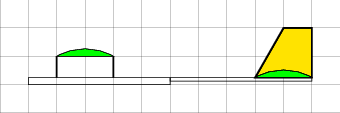

In [111]:
%%tikz
\draw[ultra thin, gray] (-1,-1) grid (11,3);
\draw (0,0) rectangle (5,0.25);
\draw (5,0.125) rectangle (10,0.25);
\draw[ultra thick] (1,0.25) -- (1,1);
\draw[ultra thick] (3,0.25) -- (3,1);
\draw[ultra thick, fill=yellow](8,0.25) -- (9,2) -- (10,2)-- (10,0.25) -- cycle;
\draw [fill=green](1,1) arc [start angle=120, end angle=60, radius=2cm] -- (3,1) -- cycle;
\draw [fill=green](8,0.25) arc [start angle=120, end angle=60, radius=2cm] -- (10,0.25) -- cycle;

This looks something like a typical indoor model airframe (minus the propeller). The two green areas represent the wing and stabilizer of our model. The yellow area is a vertical fin that is not really part of a discussion on 2D aerodynamics, so we will ignore that surface.

Both the wing and stabilizer are going to generate forces if we "blow" air across this model. What kind of forces? The kid probably has no clue!

There will be a force in the upward direction, and another force in the direction of the wind. We call the first force *lift* and the second *drag*. 

Actually, the body of this model will also generate some forces, specifically more drag, but this drag will not be as significant as that generated by the wing and stabilizer, so we will ignore that for this discussion.

Notice that we placed a grid around the model. We can think of the air surrounding this model as a bunch of particlas centered at each grid point. If the grid is very dense, thinking this way might just be useful.

Air is made up of a bunch of particles, actually molecules of atoms that make up the chemical composition of air. It is not rational to think about analyzing all of those atoms spinning around, but it does make sense to pack a chunk of them into a small cube, and analyze that. This happens to be one of the foundation ideas behind modern *computational fluid dynamics*. We will track all of the properties mentioned earler in each tiny cube, and work out how each cube interacts with its neighbors as they move around our model. The heart of our work will be to figure out how these cubes interact with the model, causing the forces we are really interested in analyzing!

In addition to all of those physical properties we mentioned earlier, we need to add the velocity of the air particle, which will be a vector with two components in ths case. We will call then $v_x$ and $v_y$.

## Gradient Operator

Our goal is to work through the math behind flight, at least at a simple level. To do that, we will need to dig a little deeper into those *derivative* gadgets, and talk about *functions* we can use to describe the air we are flying through

### Partial Derivatives

Now suppose we have another magic function that can tell us the value of some property at any point in our grid. That function needs two input variables: **x** and **y**. We say this is a multivariant (2 in this case) function. Can we take the derivative of this funciton, and if sowhat does that mean?

One way to think about this function is to plot it for values in the **x,y** plane. The value delivered by the function can be plotted as a **Z** value, producing a 3D surface of some kind. 

Let's look at an example function:

$$
f(x,y) = x y^2
$$

Let's get **matplotlib** to plot this function.

In [112]:
import math
import numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Here is a Python function modeling our test function:

In [113]:
def f(x,y):
    return x **2 * y

We need to create the grid. Since it is rectangular, we can use a list of values for **x** and **y** that will set our grid. **numpy** can do that!

In [114]:
N = 10                                    # number of points in each direction
x_start, x_end = -2.0, 2.0                # boundaries in the x-direction
y_start, y_end = -1.0, 1.0                # boundaries in the y-direction
x = numpy.linspace(x_start, y_end, N)    # creates a 1D-array with the x-coordinates
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

**numpy** can build the actual grid using these two lists. Once we have that, we can create the surface by calling our function with **x** and **y** lists as parameters. **numpy** will magically call our functon for each grid point in our grid, creating a matrix of values suitable for plotting.

In [115]:
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
Z = f(X, Y) # evaluation of the function on the grid

Finally, **matplotlib** will show us the result.

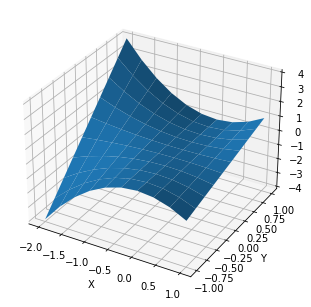

In [116]:
fig = pyplot.figure()

ax = Axes3D(fig,auto_add_to_figure=False)
ax.plot_surface(X, Y, Z)
fig.add_axes(ax)
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()

Look at this surface. What is the *derivative* od this function? It surely has a slope, bu thow can we measure it? If we pick some point on this surface, we can figure out the slop as we move along the **x** axis near that point. It also has a different slope as we move along the **y** axis near the same point. This makes finding the *derivative* of this function a puzzle. 

We can ask what the slope is along **x** if we keep **y** constant, and also ask what the slope of is along **y** keeping **x** constant. These two different slopes are called *partial derivatives* and we write then as follows:

$$
\frac{\partial f(x,y)}{\partial x}
$$
and
$$
\frac{\partial f(x,y)}{\partial y}
$$

In both cases, we are slicing through the surface with a vertical plane aligned with the axis in the denominator. The intersection of that plane with the surface is just a line in that plane, and we are looking at the *derivative* of that line.

Something interesting happens when we combine these two partial derivatives with unit vectors. We get something known as a *gradient*:
    
$$
\nabla F(x,y) = \frac{\partial f}{\partial x}\hat{i} + \frac{\partial f}{\partial y} \hat{j}
$$

It turns out that this vector points in the direction of the steepest slope of the function at each point. That is why it is known as the *gradient*!

The $\nabla$ gaget is called the  *del operator* because it takes one function and converts it into a second (vector) function. Mathematicians have been playing with this operator for quite a while! (It was invented in under a different name (*nabla* - the greek word for that symbol)  in the mid 1800s. It turns out to be very useful in explaining many things in the physical world. 

Let's play a bit with this operator now and see what we get.

Let's start off with a simple grid, which we will make 10x10. This will be a cartesian grid with the origin at the center.

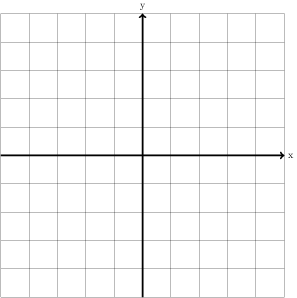

In [117]:
%%tikz
\draw[ultra thin](-5,-5) grid (5,5);
\draw[ultra thick, ->] (-5,0) -- (5,0) node[right] () {x};
\draw[ultra thick, ->] (0,-5) -- (0,5) node[above] () {y};

This grid shows a *coordnate system* we are quite familiar with. We measure things with *width*, *length*, and *height*, all measures aligned along the a grid like this (only 3D is we need all three measures.) This coordinate system is called a *Cartesian System after [Rene Descartes](https://en.wikipedia.org/wiki/Ren%C3%A9_Descartes) who thought up this scheme while watching a fly in his bedroom and wondering how to describe where that fly was at any moment. He also is credited with the invention of the *calculus* we are examining here.


Now, let's set up a function that describes a surface with a value that looks like this:

$$
f(r) = \frac{\sigma}{2 \pi r}
$$
Here **r** is the distance from the origin. 

This function could be defined in a *cartesian* coordinate system, but it would be better to use a different system. This one is called *cylinderical coordinate system, since it looks. like cylinders. IN this system, instead of **x,y,z**, we use (r, $\theta$, z) where **r** is measueed from the orign, $\theta$ is the angle from a line along what we called the **x** axis in our cartesian system, and **z** is the same as before. Note that $\theta$ is specified in *radians* to make the mathematicians happy. There are $2\pi$ radians in a full 360 degrees. 

Here is a slice through our *cylinderical coordinate system*:

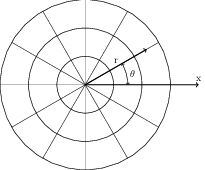

In [118]:
%%tikz
\draw[thin] (0,0) circle (1);
\draw[thin] (0,0) circle (2);
\draw[thin] (0,0) circle (3);
\draw[thick,->] (0,0) -- (4,0) node[above] {x};
\draw[thick,->] (0,0) -- node[above] {r} ++(30:2.5);
\draw[thin,<->] (1.5,0) arc (0:30:1.5)node [right, midway] {$\theta$};
\foreach \i in {1,...,12} {
    \draw[ultra thin] (0,0) -- ++(30*\i:3);
}

**z** is a vertical line through the origin of this 2D grid. The 2D grid shown is called a *polar coordinate system*.

In this *cylinderical* system, a Python function for our test function looks like this:

In [119]:
def fr(r,t):
    return sigma/(2.0 * math.pi * r)

This function will fail if called with a radius of zero. In this example, I avoided that by asking **numpy** to greate the list of **r** values starting with a small, non-zero, value.

Now, let's plot this funny function. This code makes **matplotlib** generate the plot using *cylinderical coordinates*.

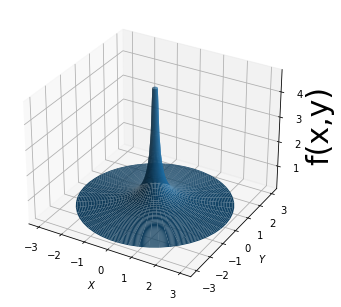

In [120]:
N = 50                                # number of points in each direction
sigma = 3.0;
fig = pyplot.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
Theta = numpy.linspace(0, 2 * numpy.pi, N)
Radius = numpy.linspace(0.1, 3, N)
R,T = X, Y = numpy.meshgrid(Radius, Theta)
Z = fr(R,T)
x = R * numpy.sin(T)
y = R * numpy.cos(T)
ax.plot_surface(x, y, Z)
fig.add_axes(ax)

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
#ax.yaxis._axinfo['label']['space_factor'] = 3.0
# set z ticks and labels
#ax.set_zticks([-2, 0, 2])
# change fontsize
#for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
# disable auto rotation
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('f(x,y)', fontsize=30, rotation = 90)
pyplot.show()

I had to tweak the starting point for **r** away from zero to get a surface we can see. That spike goes to infinity when **r** hits zero!

This is an interesting shape. The spike at the center is moving rapidly to infinity as the radius approaches zero. We call the value at a radius of zero a singularity. Everywhere else, this is a nice smooth, symmetrical shape. 

Now for the leap of faith. We are going to assume that this shape defines the velocity vector field around that centrla axis. The height of this shape give the magnitude of the velocity, and the direction is radially away from that axis. If we drop the **z** axis and look at these vectors they look something like this:

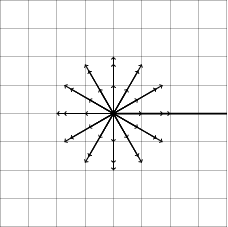

In [126]:
%%tikz
\draw[ultra thin] (-4,-4) grid (4,4);
\draw[ultra thick] (0,0) -- (4,0);
\foreach \i in {1,...,12} {
    \draw[thick,->] (0,0) -- ++(30*\i:1);
    \draw[thick,->] (0,0) -- ++(30*\i:1.75);
    \draw[thick,->] (0,0) -- ++(30*\i:2.0);
}

We call this velocity field a *source*, and we are pretending that the function represents a point that generates a supply of fluid particles that flow away from the source in all directions. There is no such physical thing, this is just a thinking exercise.

If we flip the sign on $\sigma$, the flow is into the centrla point and we call this thing a *sink*. (Makes sense, right). The key thing to notice here is that we are using a mathematical function to represent a kind of flowing fluid, like maybe air! Is thi sueseful? Actually, it is. Let's add another component to this imaginary air. 

### Superposition

This fancy work says that we can add two functions together to get something else interesting. In this case, lets add a constals flow of air across the source. This new flow will have a velocity of $V_0$ and this value applies everywhere, like the wind blowing over our model.



If we change the coordinate system we are using, this function has a much simpler form. *Cylinderical Coordinates* ($r,\theta$) are commonly used in situations like this. Basically, our function chsnges with a **r**, but there is no change in the $\theta $ direction. 

The $\nabla$ operator in cylinderical coordinates looks like this:

$$
\nabla f = \frac{\partial f}{\partial r}\hat{r} + \frac{1}{r}\frac{\partial f}{\partial \theta}\hat{\theta}
$$

In this system, our gradient function becomes just this:

$$
\nabla f = - \frac{\sigma}{\pi r^2}
$$

We can transform this back into Cartesian coordinates to get:

$$
\nabla f = = - \frac{\sigma}{\pi (x^2 + y^2)}
$$

One way to view this entire thing is to think about the gradient of our function as describing a flow away from the origin. The *del opeator* produces a velocity vector field. As we get closer and closer to the origin, that velocity gets higher and higher. Since everything seems to eminate from the origin, we call this point a *source*. (There really is no such thing in nature, we are just playing with math!) If this function described the flow of some fluid, all particles would be flowing away from this *source* in straight lines aimed away from the origin. We call those lines *streams* and our original function is a *stream function*.

If we flip the sign of our function, we would get something similar, except all the vectors would be aimed toward the origin. We call this one a *sink*. 

The magnitude of the velocity vectors can be found by finding the derivative of the function with respect to **r**. Since that function is basically  some constant divided by **r**, the derivative is just this:

$$
\frac{df}{dr} = - \frac{\sigma}{\pi r^2}
$$

Now for the fun part. Let's combine these two magical gadgets and see if we can plot the resulting velocity field using simple vector math. 

To do this, we are going to place a source function at one point, and a sink function at another point. We will give both of them the save value for $\sigma$. The radius calculation in each function is a bit more complicated since neither of this gadgets will be at the origin, but easy enough to figure out.

In [90]:
def v_source(x,y,xs,ys, sigma):
    rsq = (x-xs)**2 + (y-ys)**2
    return -sigma / (2 * math.pi * rsq)

def v_sink(x,y,xs,ys,sigma):
    rsq = (x-xs)**2 + (y-ys)**2
    return sigma / (2 * math.pi * rsq)    